In [1]:
from anisotropy.database import Database, tables
import pathlib
import peewee as pw

In [14]:
db = Database(pathlib.Path("anisotropy.db").resolve())
savefig = False

In [3]:
execution = 5
data = "flowRate"

if not db.getExecution(execution):
    print("Execution not found")

for model in db.tables:
    try:
        column = getattr(model, data)
    
    except AttributeError:
        pass

    else:
        break

In [4]:
query = model.select(tables.Shape.alpha, column, tables.Shape.direction, tables.Shape.label)
idn = db.tables.index(model)

for table in reversed(db.tables[ :idn]):
    query = query.join(table, pw.JOIN.LEFT_OUTER)
    
query = query.switch(tables.Shape)
query = query.where(
    tables.Shape.exec_id == execution,
#    tables.Shape.label == structure,
)
query = query.order_by(tables.Shape.label, tables.Shape.direction, tables.Shape.alpha)

In [5]:
with db:
    if query.exists():
        table = []
        for row in query.dicts():
            for k in row.keys():
                if type(row[k]) == list:
                    row[k] = str(row[k])

            table.append(row)
    
    else:
        table = None

if not table:
    print("Results not found")

In [6]:
from pandas import DataFrame

df = DataFrame(table)

In [8]:
a_s = [
    df[df.label == "simple"][df.direction == direction]["alpha"].reset_index(drop = True)
    for direction in ['[1.0, 0.0, 0.0]', '[0.0, 0.0, 1.0]', '[1.0, 1.0, 1.0]']
]
k_s = [ 
    df[df.label == "simple"][df.direction == direction]["flowRate"].reset_index(drop = True)
    for direction in ['[1.0, 0.0, 0.0]', '[0.0, 0.0, 1.0]', '[1.0, 1.0, 1.0]']
]
k_s2 = 2 * k_s[1] / k_s[0]
k_s3 = 2 * k_s[2] / k_s[0]

/tmp/ipykernel_33356/2997525597.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df.label == "simple"][df.direction == direction]["alpha"].reset_index(drop = True)
/tmp/ipykernel_33356/2997525597.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df.label == "simple"][df.direction == direction]["flowRate"].reset_index(drop = True)


In [9]:
a_b = [
    df[df.label == "bodyCentered"][df.direction == direction]["alpha"].reset_index(drop = True)
    for direction in ['[1.0, 0.0, 0.0]', '[0.0, 0.0, 1.0]', '[1.0, 1.0, 1.0]']
]
k_b = [ 
    df[df.label == "bodyCentered"][df.direction == direction]["flowRate"].reset_index(drop = True)
    for direction in ['[1.0, 0.0, 0.0]', '[0.0, 0.0, 1.0]', '[1.0, 1.0, 1.0]']
]
k_b2 = 2 * k_b[1] / k_b[0]
k_b3 = 2 * k_b[2] / k_b[0]

/tmp/ipykernel_33356/723496196.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df.label == "bodyCentered"][df.direction == direction]["alpha"].reset_index(drop = True)
/tmp/ipykernel_33356/723496196.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df.label == "bodyCentered"][df.direction == direction]["flowRate"].reset_index(drop = True)


In [10]:
a_f = [
    df[df.label == "faceCentered"][df.direction == direction]["alpha"].reset_index(drop = True)
    for direction in ['[1.0, 0.0, 0.0]', '[0.0, 0.0, 1.0]', '[1.0, 1.0, 1.0]']
]
k_f = [ 
    df[df.label == "faceCentered"][df.direction == direction]["flowRate"].reset_index(drop = True)
    for direction in ['[1.0, 0.0, 0.0]', '[0.0, 0.0, 1.0]', '[1.0, 1.0, 1.0]']
]
k_f2 = 2 * k_f[1] / k_f[0]
k_f3 = 2 * k_f[2] / k_f[0]

/tmp/ipykernel_33356/1402688131.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df.label == "faceCentered"][df.direction == direction]["alpha"].reset_index(drop = True)
/tmp/ipykernel_33356/1402688131.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df.label == "faceCentered"][df.direction == direction]["flowRate"].reset_index(drop = True)


In [11]:
k_f3[20] = (k_f3[18] + k_f3[21]) * 0.5
k_f3[19] = (k_f3[20] + k_f3[18]) * 0.5
k_f2[19] = (k_f2[20] + k_f2[18]) * 0.5

k_b2[24] = (k_b2[25] + k_b2[23]) * 0.5
k_b3[24] = (k_b3[25] + k_b3[23]) * 0.5

In [12]:
import matplotlib.pyplot as plt

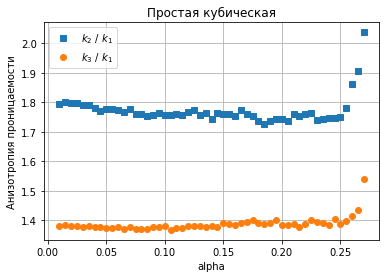

In [17]:
fig, ax = plt.subplots(nrows = 1, ncols = 1)
ax.plot(a_s[0], k_s2, "s", label = "$k_2$ / $k_1$")
ax.plot(a_s[0], k_s3, "o", label = "$k_3$ / $k_1$")
plt.legend()
plt.grid(True)
plt.xlabel("alpha")
plt.ylabel("Анизотропия проницаемости")
plt.title("Простая кубическая")
plt.show()

if savefig:
    fig.savefig("anisotropy-simple.png")

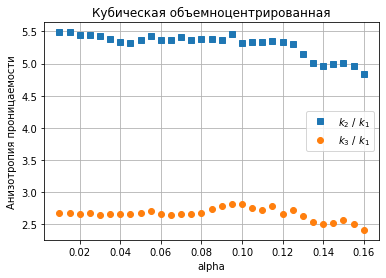

In [18]:
fig, ax = plt.subplots(nrows = 1, ncols = 1)
ax.plot(a_b[0], k_b2, "s", label = "$k_2$ / $k_1$")
ax.plot(a_b[0], k_b3, "o", label = "$k_3$ / $k_1$")
plt.legend()
plt.grid(True)
plt.xlabel("alpha")
plt.ylabel("Анизотропия проницаемости")
plt.title("Кубическая объемноцентрированная")

if savefig:
    fig.savefig("anisotropy-bodycentered.png")

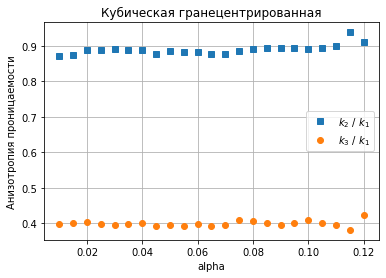

In [19]:
fig, ax = plt.subplots(nrows = 1, ncols = 1)
ax.plot(a_f[0], k_f2, "s", label = "$k_2$ / $k_1$")
ax.plot(a_f[0], k_f3, "o", label = "$k_3$ / $k_1$")
plt.legend()
plt.grid(True)
plt.xlabel("alpha")
plt.ylabel("Анизотропия проницаемости")
plt.title("Кубическая гранецентрированная")

if savefig:
    fig.savefig("anisotropy-facecentered.png")